In [280]:
# Importing libraries needed for the project
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import linregress
import matplotlib.pyplot as plt
import plotly.express as px
from math import ceil #The math.ceil() method rounds a number UP to the nearest integer, if necessary, and returns the result.
from urllib.request import urlopen
import json
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) # https://stackoverflow.com/questions/15777951/how-to-suppress-pandas-future-warning

Data cleaning


In [281]:
# Load the Excel file into a DataFrame
data = pd.read_excel("./All_time_together.xlsx")

# Save the DataFrame as a CSV file
data.to_csv("./All_time_together.csv", index=False)

# Display the first few rows (optional, just to check the data)
data.head()


,User Name,Time limit for each question,Score(%),Score 1,Attempt Date,Taken Time,What is your gender?,How old are you?,"An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",Answer,...,Time 3,How confident are you?,What are characteristics of polynomial functions and other nonlinear graphs?,Answer.3,Time 4,How confident are you in your answers.2,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Answer.4,Time 5,How confident are you in your answers.3
0,Guest1,2 min,14.285714,1,11-6-2024 12:43:26 PM,0:3:27,Female,28,Incorrect,NaN,...,00:02:00,Not at all confident,Correct,A polynomial function can be represented in fa...,00:01:50,Not at all confident,Incorrect,Hungary,00:02:00,Not at all confident
1,Guest2,2 min,14.285714,1,11-6-2024 09:56:16 AM,0:3:3,Female,25,Correct,196 J,...,00:01:16,Not at all confident,Incorrect,Polynomial functions are linear and have only ...,00:00:23,Not at all confident,Incorrect,NaN,00:00:02,Not at all confident
2,Guest3,2 min,14.285714,1,11-6-2024 09:40:01 AM,0:4:39,Male,26,Incorrect,NaN,...,00:01:59,Not at all confident,Incorrect,Rational functions have their input in the num...,00:01:48,Slightly confident,Incorrect,East Germany,00:01:54,Not at all confident
3,Guest4,2 min,14.285714,1,11-6-2024 09:25:58 AM,0:3:7,Male,23,Incorrect,98 J,...,00:00:33,Slightly confident,Correct,A polynomial function can be represented in fa...,00:01:24,Slightly confident,Incorrect,Czechoslovakia,00:01:54,Not at all confident
4,Guest5,2 min,28.571428,1,11-6-2024 09:11:37 AM,0:3:3,Male,22,Correct,196 J,...,00:00:20,Extremely confident,Correct,A polynomial function can be represented in fa...,00:00:55,Extremely confident,Correct,Romania,00:01:55,Quite confident


In [282]:
# Calculate the total score from the two score columns
data['Total_Score'] = data['Score 1'] + data['Score 2']

# Calculate % of total score
data['Total_Score_%'] = (data['Total_Score'] / 5) * 100

# Display all the scores
data[['Score 1', 'Score 2', 'Total_Score', 'Total_Score_%']]

,Score 1,Score 2,Total_Score,Total_Score_%
0,1,1,2,40.0
1,1,1,2,40.0
2,1,1,2,40.0
3,1,2,3,60.0
4,1,3,4,80.0
5,1,3,4,80.0
6,0,2,2,40.0
7,1,3,4,80.0
8,1,2,3,60.0
9,2,3,5,100.0


In [283]:
# Convert the time columns to seconds and sum them
def time_to_seconds(time_str):
    h, m, s = map(int, time_str.split(':'))
    return h * 3600 + m * 60 + s

# Sum the times and make a total time data column
data['Total_Time'] = data[['Time 1', 'Time 2', 'Time 3', 'Time 4', 'Time 5']].applymap(time_to_seconds).sum(axis=1)

# Convert time to Hour, minutes and seconds format
def seconds_to_hms(seconds):
    h = seconds // 3600
    m = (seconds % 3600) // 60
    s = seconds % 60
    return f"{h:02}:{m:02}:{s:02}"

data['Total_Time_HHMMSS'] = data['Total_Time'].apply(seconds_to_hms)

In [284]:
data['Total_Time_HHMMSS']

0     00:08:56
1     00:04:11
2     00:09:29
3     00:06:36
4     00:05:56
5     00:06:38
6     00:06:50
7     00:09:03
8     00:07:40
9     00:06:08
10    00:08:02
11    00:08:47
12    00:02:46
13    00:07:35
14    00:09:02
15    00:11:45
16    00:06:23
17    00:08:41
18    00:12:45
19    00:15:54
20    00:12:34
21    00:09:54
22    00:09:25
23    00:09:15
24    00:05:17
25    00:09:01
26    00:07:09
27    00:08:36
28    00:10:27
29    00:09:46
Name: Total_Time_HHMMSS, dtype: object

In [285]:
# Update the spreadsheet
data.to_excel('updated_file.xlsx', index=False)


Descriptive data

In [286]:
# Overall mean total score percentage and total time
overall_mean_score = data['Total_Score_%'].mean()
overall_mean_time = data['Total_Time'].mean()  # In seconds

print(f"Overall Mean Total Score (%): {overall_mean_score}")
print(f"Overall Mean Total Time (seconds): {overall_mean_time}")

# Group by time limit and calculate mean total score percentage and total time
grouped_means = data.groupby('Time limit for each question').agg({
    'Total_Score_%': 'mean',
    'Total_Time': 'mean'
})

# Convert mean total time back to HH:MM:SS for readability
grouped_means['Mean Total Time (HH:MM:SS)'] = grouped_means['Total_Time'].apply(seconds_to_hms)

print(grouped_means)



Overall Mean Total Score (%): 76.66666666666667
Overall Mean Total Time (seconds): 509.03333333333336
                              Total_Score_%  Total_Time  \
Time limit for each question                              
2 min                                  62.0       428.7   
4 min                                  88.0       550.0   
No time limit                          80.0       548.4   

                             Mean Total Time (HH:MM:SS)  
Time limit for each question                             
2 min                         0.0:7.0:8.699999999999989  
4 min                                      0.0:9.0:10.0  
No time limit                 0.0:9.0:8.399999999999977  


In [287]:
# Group by Confidence and Time Limit to get mean scores and times
grouped_confidence = data.groupby(['How confident are you in your answers', 'Time limit for each question']).agg({
    'Total_Score_%': 'mean',
    'Total_Time': 'mean'
}).reset_index()

# Convert total time back to HH:MM:SS format for readability
grouped_confidence['Mean Total Time (HH:MM:SS)'] = grouped_confidence['Total_Time'].apply(seconds_to_hms)

# Display the grouped results
print(grouped_confidence)

   How confident are you in your answers Time limit for each question  \
0                    Extremely confident                        2 min   
1                    Extremely confident                        4 min   
2                    Extremely confident                No time limit   
3                   Not at all confident                        2 min   
4                        Quite confident                        2 min   
5                        Quite confident                        4 min   
6                        Quite confident                No time limit   
7                     Slightly confident                        4 min   
8                     Somewhat confident                        2 min   
9                     Somewhat confident                        4 min   
10                    Somewhat confident                No time limit   

    Total_Score_%  Total_Time  Mean Total Time (HH:MM:SS)  
0       73.333333  378.000000                0.0:6.0:18.0  
1  

In [288]:
print(data.columns)

Index(['User Name', 'Time limit for each question', 'Score(%)', 'Score 1',
       'Attempt Date', 'Taken Time', 'What is your gender?',
       'How old are you?',
       'An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)',
       'Answer', 'Time 1', 'How confident are you in your answers',
       'Which hormone is responsible for triggering ovulation during the menstrual cycle?',
       'Answer.1', 'Time 2', 'How confident are you in your answers.1',
       'Taken Time (2)', 'Score(%) (2)', 'Score 2',
       'Which of the following is equivalent to', 'Answer.2', 'Time 3',
       'How confident are you?',
       'What are characteristics of polynomial functions and other nonlinear graphs?',
       'Answer.3', 'Time 4', 'How confident are you in your answers.2',
       'The collapse of Communist rule throughout Eastern Europe occu

   How confident are you in your answers Time limit for each question  \
0                   Not at all confident                        2 min   
1                   Not at all confident                        4 min   
2                   Not at all confident                No time limit   
3                     Slightly confident                        2 min   
4                     Slightly confident                        4 min   
5                     Slightly confident                No time limit   
6                     Somewhat confident                        2 min   
7                     Somewhat confident                        4 min   
8                     Somewhat confident                No time limit   
9                        Quite confident                        2 min   
10                       Quite confident                        4 min   
11                       Quite confident                No time limit   
12                   Extremely confident           

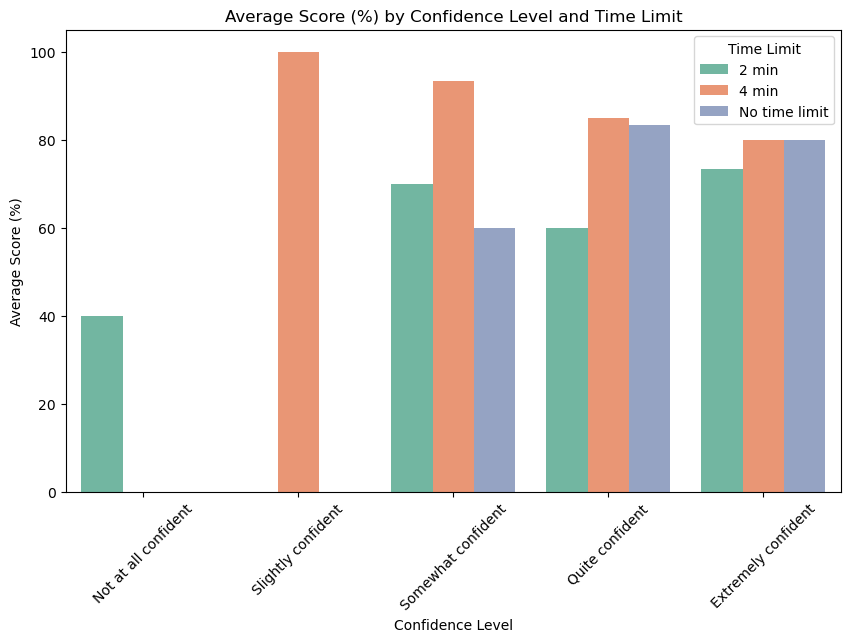

In [289]:
# First, define the custom order for 'How confident are you in your answers'
confidence_order = ['Not at all confident', 'Slightly confident', 'Somewhat confident', 'Quite confident', 'Extremely confident']

# Convert the 'How confident are you in your answers' column to a categorical type with the defined order
data['How confident are you in your answers'] = pd.Categorical(data['How confident are you in your answers'], categories=confidence_order, ordered=True)

# Group by Confidence and Time Limit to get the mean Total_Score_% and Total_Time
grouped_confidence_time = data.groupby(['How confident are you in your answers', 'Time limit for each question']).agg({
    'Total_Score_%': 'mean',    # Average score for the group
    'Total_Time': 'mean'        # Average time for the group
}).reset_index()

# Convert Total Time to HH:MM:SS for readability
grouped_confidence_time['Mean Total Time (HH:MM:SS)'] = grouped_confidence_time['Total_Time'].apply(seconds_to_hms)

# Display the results
print(grouped_confidence_time)

# Create a bar plot for Total_Score_% by Confidence and Time Limit
plt.figure(figsize=(10, 6))
sns.barplot(data=grouped_confidence_time, 
            x='How confident are you in your answers', 
            y='Total_Score_%', 
            hue='Time limit for each question', 
            palette='Set2')

plt.title('Average Score (%) by Confidence Level and Time Limit')
plt.xlabel('Confidence Level')
plt.ylabel('Average Score (%)')
plt.xticks(rotation=45)
plt.legend(title='Time Limit')
plt.show()


In [290]:
from scipy.stats import shapiro

# Separate the data by time limit
score_2min = data[data['Time limit for each question'] == '2 min']['Total_Score_%']
score_4min = data[data['Time limit for each question'] == '4 min']['Total_Score_%']
score_no_time = data[data['Time limit for each question'] == 'No time limit']['Total_Score_%']

print("If value is greater than 0.05, then the data is likely normal distribution, otherwise, it is not normally distributed") 


# Shapiro-Wilk Test for 2min group
stat, p_value = shapiro(score_2min)
if p_value > 0.05:
    print("Shapiro-Wilk Test 2min: p-value =", p_value, "- Likely normal distribution")
else:
    print("Shapiro-Wilk Test 2min: p-value =", p_value, "- Not a normal distribution")

# Shapiro-Wilk Test for 4min group
stat, p_value = shapiro(score_4min)
if p_value > 0.05:
    print("Shapiro-Wilk Test 4min: p-value =", p_value, " > 0.05 - Likely normal distribution")
else:
    print("Shapiro-Wilk Test 4min: p-value =", p_value, "- Not a normal distribution")

# Shapiro-Wilk Test for no time limit group
stat, p_value = shapiro(score_no_time)
if p_value > 0.05:
    print("Shapiro-Wilk Test no time limit: p-value =", p_value, "- Likely normal distribution")
else:
    print("Shapiro-Wilk Test no time limit: p-value =", p_value, "- Not a normal distribution")

If value is greater than 0.05 means normal distribution, if not then not normal distribution 
Shapiro-Wilk Test 2min: p-value = 0.06718982011079788 - Likely normal distribution
Shapiro-Wilk Test 4min: p-value = 0.00016867939848452806 - Not a normal distribution
Shapiro-Wilk Test no time limit: p-value = 0.045030515640974045 - Not a normal distribution


In [291]:
from scipy import stats
import pandas as pd

# Perform Kruskal-Wallis test between all three groups
kruskal_test = stats.kruskal(score_2min, score_4min, score_no_time)

# Print the results of the Kruskal-Wallis test
print("Kruskal-Wallis Test Result:", kruskal_test)

# If the p-value is below the significance level (0.05), it suggests that there is a significant difference
alpha = 0.05
if kruskal_test.pvalue < alpha:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


Kruskal-Wallis Test Result: KruskalResult(statistic=7.693997965412008, pvalue=0.02134369321513687)
There is a significant difference between the groups.


In [292]:
from scipy.stats import mannwhitneyu

# Separate the data by time limit
score_2min = data[data['Time limit for each question'] == '2 min']['Total_Score_%']
score_4min = data[data['Time limit for each question'] == '4 min']['Total_Score_%']
score_no_time = data[data['Time limit for each question'] == 'No time limit']['Total_Score_%']

# Perform pairwise Mann-Whitney U tests between all groups
u_test_2min_4min = mannwhitneyu(score_2min, score_4min, alternative='two-sided')
u_test_2min_no_time = mannwhitneyu(score_2min, score_no_time, alternative='two-sided')
u_test_4min_no_time = mannwhitneyu(score_4min, score_no_time, alternative='two-sided')

# Adjusted significance level (Bonferroni correction)
alpha_adjusted = 0.05 / 3  # 3 comparisons
print(alpha_adjusted)

# Store p-values for each comparison
p_values = {
    "2 min vs 4 min": u_test_2min_4min.pvalue,
    "2 min vs No time limit": u_test_2min_no_time.pvalue,
    "4 min vs No time limit": u_test_4min_no_time.pvalue
}

# Check significance after Bonferroni correction
for comparison, p_value in p_values.items():
    if p_value < alpha_adjusted:
        print(f"{comparison}: Significant (p-value: {p_value:.4f})")
    else:
        print(f"{comparison}: Not Significant (p-value: {p_value:.4f})")


0.016666666666666666
2 min vs 4 min: Significant (p-value: 0.0091)
2 min vs No time limit: Not Significant (p-value: 0.0748)
4 min vs No time limit: Not Significant (p-value: 0.3726)


In [293]:
import pandas as pd

# Create a DataFrame for the results
results = pd.DataFrame({
    "Comparison": ["2 min vs 4 min", "2 min vs No time limit", "4 min vs No time limit"],
    "U Statistic": [u_test_2min_4min.statistic, u_test_2min_no_time.statistic, u_test_4min_no_time.statistic],
    "p-value": [u_test_2min_4min.pvalue, u_test_2min_no_time.pvalue, u_test_4min_no_time.pvalue],
    "Significant": [
        "Yes" if u_test_2min_4min.pvalue < alpha_adjusted else "No",
        "Yes" if u_test_2min_no_time.pvalue < alpha_adjusted else "No",
        "Yes" if u_test_4min_no_time.pvalue < alpha_adjusted else "No"
    ]
})

# Print the table
print(results)


               Comparison  U Statistic   p-value Significant
0          2 min vs 4 min         17.0  0.009071         Yes
1  2 min vs No time limit         27.0  0.074796          No
2  4 min vs No time limit         61.0  0.372601          No


2 min vs 4 min:
p-value = 0.0033 (Less than 0.0167, which is the adjusted threshold after Bonferroni correction).
Conclusion: Significant difference between the 2 min and 4 min time limits. The 4 min group performed significantly better than the 2 min group.

p-value = 0.0652 (Greater than 0.0167).
Conclusion: Not significant. There is no statistically significant difference between the 2 min and No time limit groups, suggesting that the time limit did not significantly affect the scores compared to the no time limit condition.

p-value = 0.2546 (Greater than 0.0167).
Conclusion: Not significant. No significant difference between the 4 min and No time limit groups, suggesting that increasing the time limit from 4 minutes to no time limit did not lead to a statistically significant difference in scores.



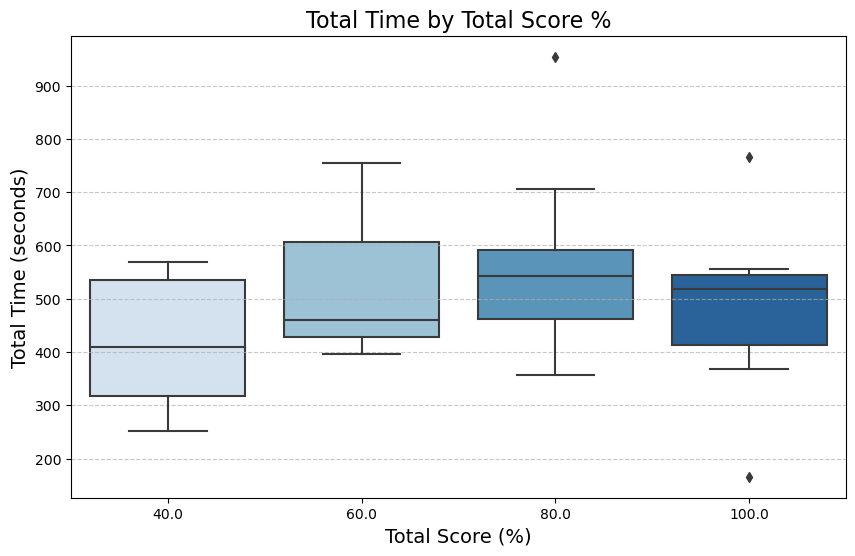

In [294]:
data_cleaned = data.dropna(subset=['Total_Time', 'Total_Score_%'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Total_Score_%', y='Total_Time', data=data_cleaned, palette='Blues')
plt.title('Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Total Time (seconds)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


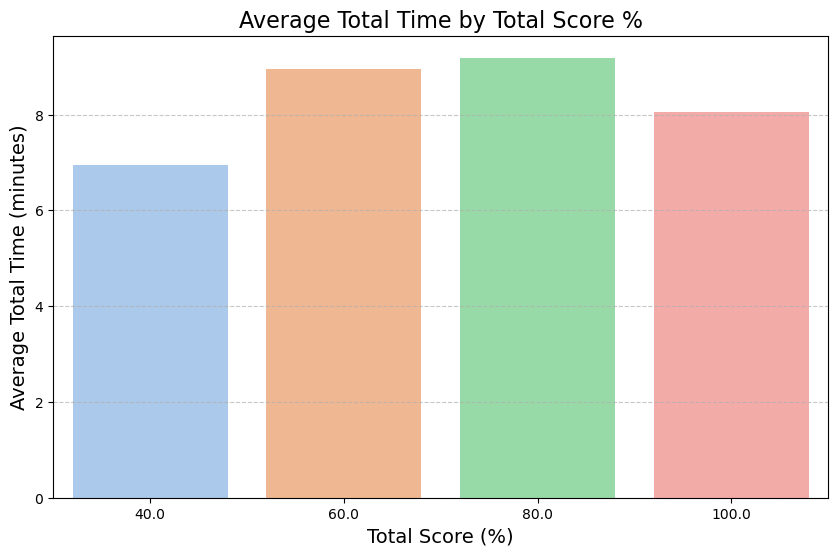

In [295]:
# Convert the time to minutes
def time_to_minutes(seconds):
    return seconds / 60

data['Total_Time_Minutes'] = time_to_minutes(data['Total_Time'])

data_cleaned = data.dropna(subset=['Total_Time_Minutes', 'Total_Score_%'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Total_Score_%', y='Total_Time_Minutes', data=data_cleaned, ci=None, palette='pastel')
plt.title('Average Total Time by Total Score %', fontsize=16)
plt.xlabel('Total Score (%)', fontsize=14)
plt.ylabel('Average Total Time (minutes)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 


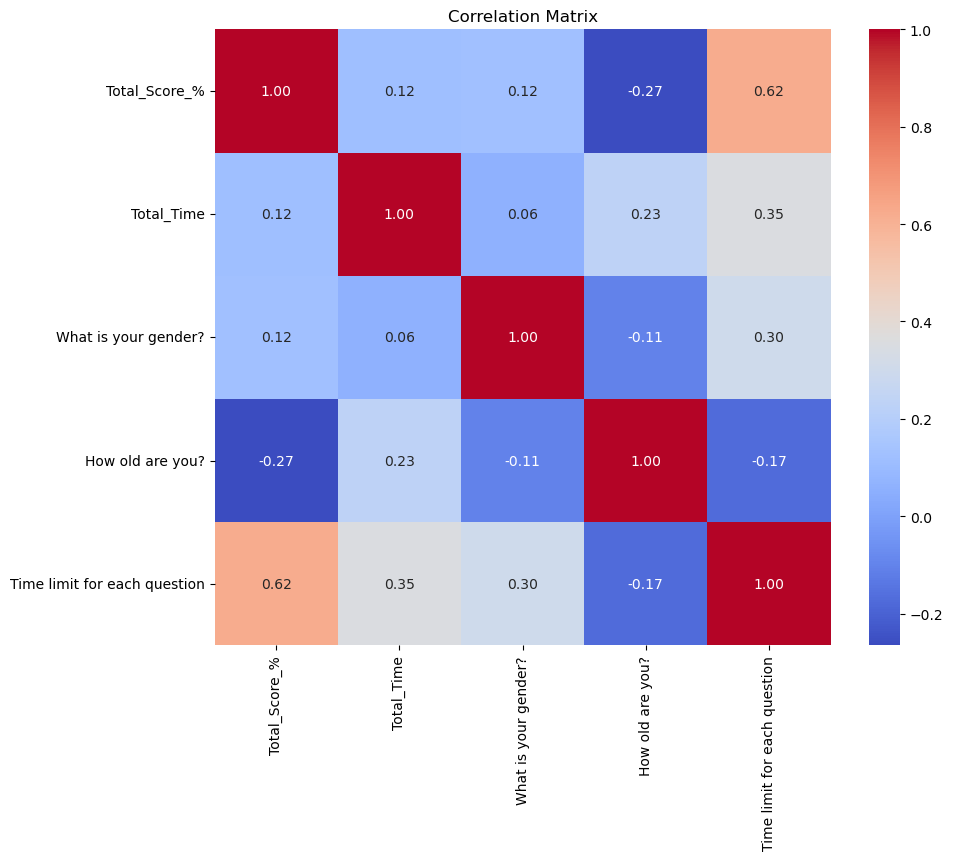

In [296]:
# Extract the relevant columns for the correlation matrix
correlation_columns_reuploaded = [
    "Total_Score_%",
    "Total_Time",
    "What is your gender?",
    "How old are you?",
    "Time limit for each question"
]

# Prepare the data for correlation matrix
correlation_data = data[correlation_columns_reuploaded].copy()

# Map categorical data to numerical values for correlation
# Map gender to numerical values
correlation_data["What is your gender?"] = correlation_data["What is your gender?"].map({"Male": 0, "Female": 1})

# Map time limit to numerical values
correlation_data["Time limit for each question"] = correlation_data["Time limit for each question"].str.extract('(\d+)').astype(float)

# Convert Total Time to numeric (seconds)
correlation_data["Total_Time"] = pd.to_numeric(correlation_data["Total_Time"], errors="coerce")

# Drop rows with missing values
correlation_data = correlation_data.dropna()

# Compute the correlation matrix
correlation_matrix = correlation_data.corr()

# Visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix")
plt.show()

Correlation matrix skulle have vist all tallene i plottet, som den vises for neden, ved ikke hvorfor, den ikke gør det.

In [297]:
correlation_matrix

,Total_Score_%,Total_Time,What is your gender?,How old are you?,Time limit for each question
Total_Score_%,1.000000,0.117893,0.120470,-0.265500,0.623302
Total_Time,0.117893,1.000000,0.058646,0.231495,0.354438
What is your gender?,0.120470,0.058646,1.000000,-0.106360,0.301511
How old are you?,-0.265500,0.231495,-0.106360,1.000000,-0.172276
Time limit for each question,0.623302,0.354438,0.301511,-0.172276,1.000000


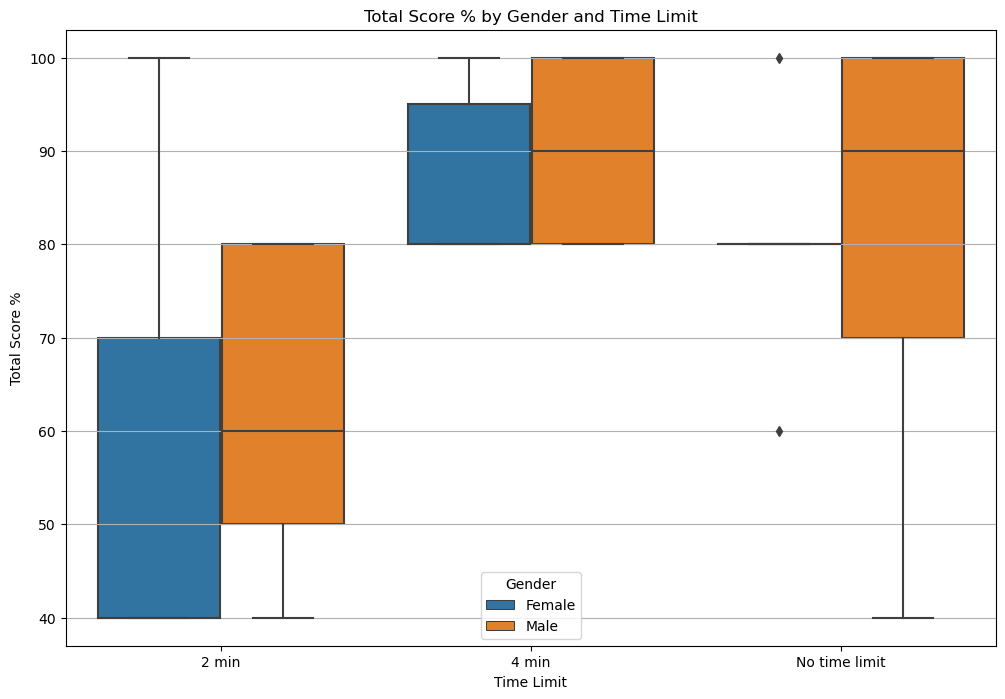

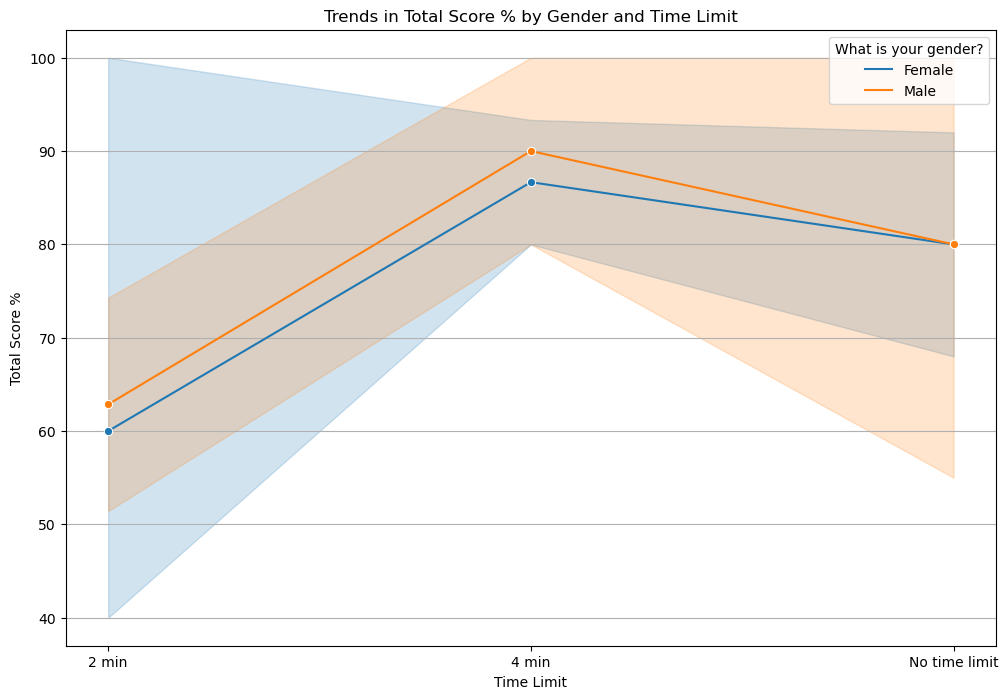

In [298]:
# Prepare the data
gender_time_score_data = data[
    ["What is your gender?", "Time limit for each question", "Total_Score_%"]
].copy()

# Map genders for clarity
gender_time_score_data["What is your gender?"] = gender_time_score_data["What is your gender?"].map(
    {"Male": "Male", "Female": "Female"}
)

# Box Plot
plt.figure(figsize=(12, 8))
sns.boxplot(
    x="Time limit for each question",
    y="Total_Score_%",
    hue="What is your gender?",
    data=gender_time_score_data,
)
plt.title("Total Score % by Gender and Time Limit")
plt.xlabel("Time Limit")
plt.ylabel("Total Score %")
plt.legend(title="Gender")
plt.grid(axis="y")
plt.show()

# Line Plot
plt.figure(figsize=(12, 8))
sns.lineplot(
    x="Time limit for each question",
    y="Total_Score_%",
    hue="What is your gender?",
    data=gender_time_score_data,
    marker="o",
)
plt.title("Trends in Total Score % by Gender and Time Limit")
plt.xlabel("Time Limit")
plt.ylabel("Total Score %")
plt.grid(axis="y")
plt.show()

In [299]:
data["Time limit for each question"] = data["Time limit for each question"].replace(
    {"2 min": "2 Min", "4 min": "4 Min", "No limit": "No Time Limit"}
)

boxplot_overall_data = data[["Time limit for each question", "Total_Score_%"]]

question_columns = [
    "An object with a mass of 2 kg is lifted to a height of 10 meters. After being released, how much kinetic energy will the object have just before hitting the ground? (Assume g9.8m/s^2 and ignore air resistance)",
    "Which hormone is responsible for triggering ovulation during the menstrual cycle?",
    "Which of the following is equivalent to",
    "What are characteristics of polynomial functions and other nonlinear graphs?",
    "The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT"
]

boxplot_question_data = {}

for idx, col in enumerate(question_columns, start=1):
    boxplot_question_data[f"Question {idx}"] = data[["Time limit for each question", col]].copy()
    # Map correctness to numerical values for plotting
    boxplot_question_data[f"Question {idx}"][col] = boxplot_question_data[f"Question {idx}"][col].map(
        {"Correct": 1, "Incorrect": 0}
    )

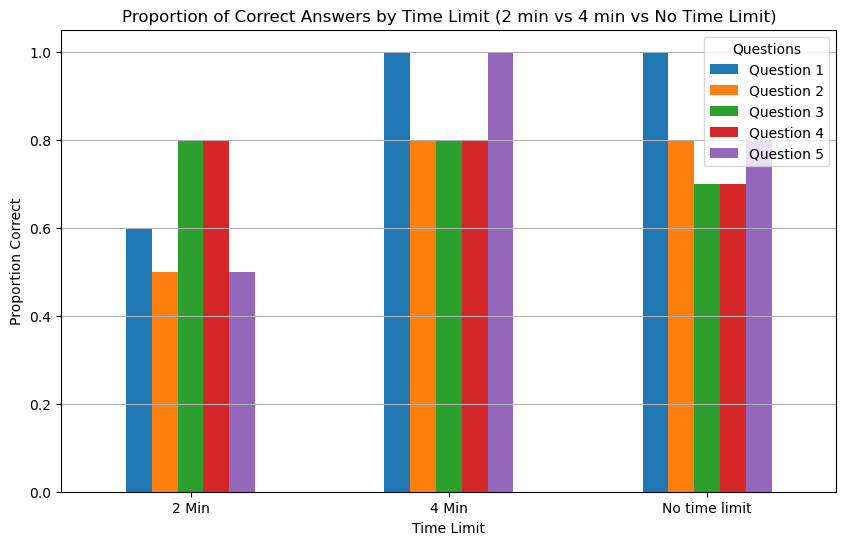

In [300]:
# Proportions of correct answers by time limit for each question
proportions_by_time_limit = {
    f"Question {idx + 1}": data.groupby("Time limit for each question")[data.columns[1]].mean()
    for idx, (question, data) in enumerate(boxplot_question_data.items())
}

# Converted to dataframe for plotting purposes
proportions_df = pd.DataFrame(proportions_by_time_limit).reset_index()
proportions_df = proportions_df.rename(columns={"Time limit for each question": "Time Limit"})

# Plot grouped bar chart
proportions_df.set_index("Time Limit").plot(kind="bar", figsize=(10, 6))
plt.title("Proportion of Correct Answers by Time Limit (2 min vs 4 min vs No Time Limit)")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(title="Questions")
plt.show()


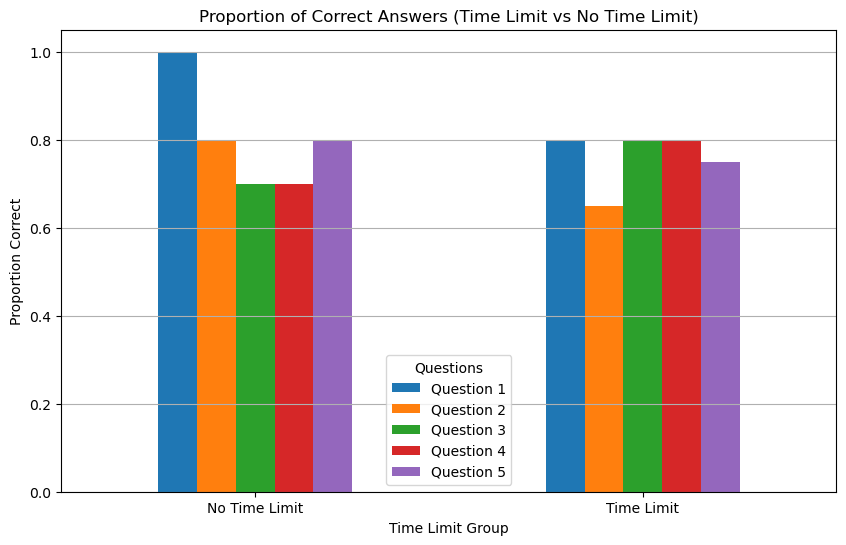

In [301]:
# 2 min and 4 min combined called time limit
for question, data in boxplot_question_data.items():
    data["Time Limit Group"] = data["Time limit for each question"].apply(
        lambda x: "Time Limit" if x in ["2 Min", "4 Min"] else "No Time Limit"
    )

# Proportions of correct answers for the grouped time limits
proportions_grouped_time_limit = {
    f"{question}": data.groupby("Time Limit Group")[data.columns[1]].mean()
    for question, data in boxplot_question_data.items()
}

# Converted to dataframe for plotting purposes
proportions_grouped_df = pd.DataFrame(proportions_grouped_time_limit).reset_index()
proportions_grouped_df = proportions_grouped_df.rename(columns={"Time Limit Group": "Time Limit"})

# Plot grouped bar chart for correctness proportions (grouped time limits)
proportions_grouped_df.set_index("Time Limit").plot(kind="bar", figsize=(10, 6))
plt.title("Proportion of Correct Answers (Time Limit vs No Time Limit)")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit Group")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.legend(title="Questions")
plt.show()


In [302]:
from scipy.stats import fisher_exact

# Explicitly filter and count "No time limit" entries for correctness
time_limit_correct = (
    sum(
        data[data["Time limit for each question"] == "2 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
    + sum(
        data[data["Time limit for each question"] == "4 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
)
time_limit_incorrect = (
    sum(
        len(data[data["Time limit for each question"] == "2 Min"]) - data[data["Time limit for each question"] == "2 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
    + sum(
        len(data[data["Time limit for each question"] == "4 Min"]) - data[data["Time limit for each question"] == "4 Min"][data.columns[1]].sum()
        for data in boxplot_question_data.values()
    )
)

no_time_limit_correct = sum(
    data[data["Time limit for each question"] == "No time limit"][data.columns[1]].sum()
    for data in boxplot_question_data.values()
)
no_time_limit_total = sum(
    len(data[data["Time limit for each question"] == "No time limit"])
    for data in boxplot_question_data.values()
)
no_time_limit_incorrect = no_time_limit_total - no_time_limit_correct

# Rebuild the contingency table with corrected data
fisher_table_corrected = [
    [time_limit_correct, no_time_limit_correct],
    [time_limit_incorrect, no_time_limit_incorrect],
]

# Perform Fisher's Exact Test with the corrected data
odds_ratio_corrected, p_value_corrected = fisher_exact(fisher_table_corrected)

# Display the corrected results
fisher_results_corrected = {
    "Fisher's Exact Test Table": fisher_table_corrected,
    "Odds Ratio": odds_ratio_corrected,
    "p-value": p_value_corrected,
}
fisher_results_corrected

{"Fisher's Exact Test Table": [[76, 40], [24, 10]],
 'Odds Ratio': 0.7916666666666666,
 'p-value': 0.6810792018070683}

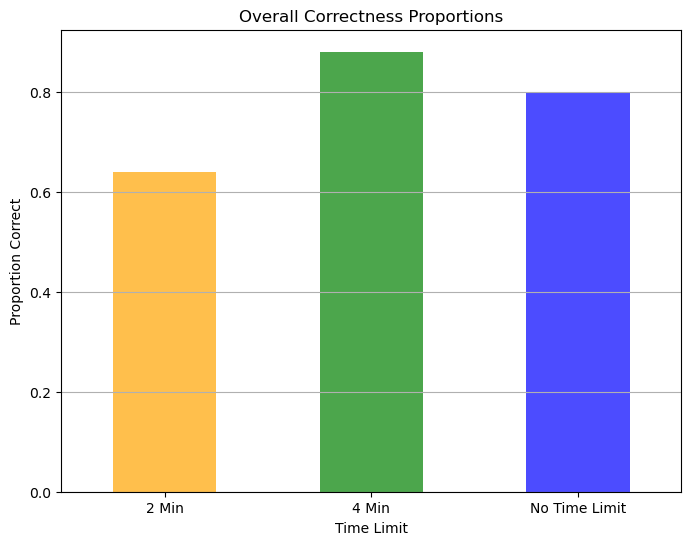

In [303]:
# Overall correctness proportions for 2 Min, 4 Min, and No Time Limit
overall_correctness_detailed = pd.concat(
    [data.groupby("Time limit for each question")[data.columns[1]].mean() for data in boxplot_question_data.values()],
    axis=1,
).mean(axis=1)

# Barplot for overall correctness
overall_correctness_detailed.plot(kind="bar", figsize=(8, 6), color=["orange", "green", "blue"], alpha=0.7)
plt.title("Overall Correctness Proportions")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit")
plt.xticks([0, 1, 2], ["2 Min", "4 Min", "No Time Limit"], rotation=0)
plt.grid(axis="y")
plt.show()


In [304]:
import numpy as np

# Define a function to compute the proportion of correct answers for each time limit group
def compute_correctness_proportions(data, time_limits):
    proportions = []
    for time_limit in time_limits:
        correct = sum(
            data[data["Time limit for each question"] == time_limit][data.columns[1]].sum()
            for data in boxplot_question_data.values()
        )
        total = sum(
            len(data[data["Time limit for each question"] == time_limit])
            for data in boxplot_question_data.values()
        )
        proportions.append(correct / total if total > 0 else 0)
    return proportions

# Time limit groups to analyze
time_limits = ["2 Min", "4 Min", "No time limit"]

# Number of bootstrap iterations
n_bootstraps = 10000

# Perform bootstrapping
bootstrapped_proportions = []
for _ in range(n_bootstraps):
    # Resample the dataset with replacement
    resampled_data = data.sample(frac=1, replace=True)
    
    # Compute correctness proportions for each group
    proportions = compute_correctness_proportions(resampled_data, time_limits)
    bootstrapped_proportions.append(proportions)

# Convert to a NumPy array for easier processing
bootstrapped_proportions = np.array(bootstrapped_proportions)

# Compute confidence intervals (95% CI)
ci_lower = np.percentile(bootstrapped_proportions, 2.5, axis=0)
ci_upper = np.percentile(bootstrapped_proportions, 97.5, axis=0)

# Aggregate results
bootstrap_results = {
    "Time Limit": time_limits,
    "Mean Proportion": bootstrapped_proportions.mean(axis=0),
    "95% CI Lower": ci_lower,
    "95% CI Upper": ci_upper,
}

# Display results
import pandas as pd
results_df = pd.DataFrame(bootstrap_results)

In [305]:
results_df

,Time Limit,Mean Proportion,95% CI Lower,95% CI Upper
0,2 Min,0.64,0.64,0.64
1,4 Min,0.88,0.88,0.88
2,No time limit,0.80,0.80,0.80


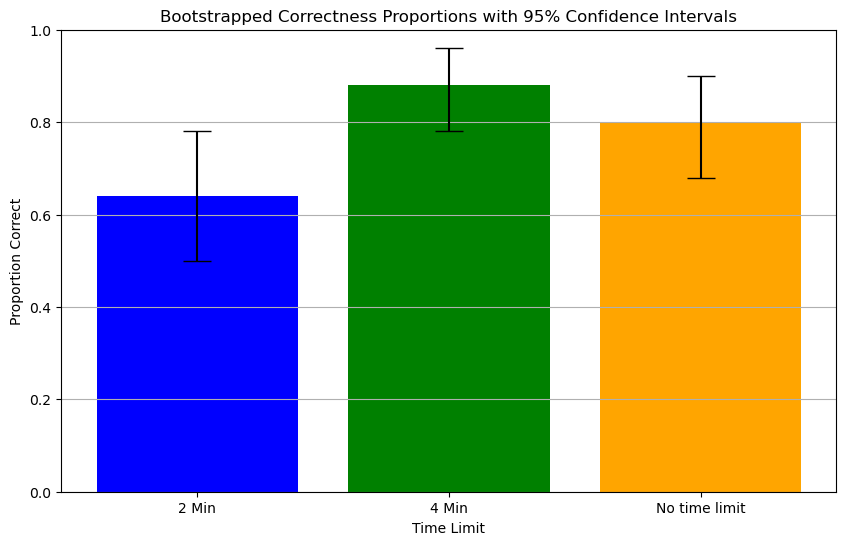

In [306]:
import matplotlib.pyplot as plt
import numpy as np

# Example values for bootstrapped results (replace these with your computed values)
time_limits = ["2 Min", "4 Min", "No time limit"]
mean_proportions = np.array([0.64, 0.88, 0.80])  # Replace with your bootstrapped means
ci_lower = np.array([0.50, 0.78, 0.68])          # Replace with your lower CI
ci_upper = np.array([0.78, 0.96, 0.90])          # Replace with your upper CI

# Create a bar plot with error bars for the 95% confidence intervals
plt.figure(figsize=(10, 6))
plt.bar(
    time_limits,
    mean_proportions,
    yerr=[mean_proportions - ci_lower, ci_upper - mean_proportions],
    capsize=10,
    color=["blue", "green", "orange"],
)
plt.title("Bootstrapped Correctness Proportions with 95% Confidence Intervals")
plt.ylabel("Proportion Correct")
plt.xlabel("Time Limit")
plt.ylim(0, 1)  # Proportions range from 0 to 1
plt.grid(axis="y")
plt.show()

In [307]:
data.head()

,Time limit for each question,The collapse of Communist rule throughout Eastern Europe occurred peacefully in all of the following countries EXCEPT,Time Limit Group
0,2 Min,0,Time Limit
1,2 Min,0,Time Limit
2,2 Min,0,Time Limit
3,2 Min,0,Time Limit
4,2 Min,1,Time Limit
